In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [2]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
from datasets import load_dataset, concatenate_datasets
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from scipy.stats import entropy
# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# 데이터 로딩 및 문장 추출
dataset = load_dataset("li2017dailydialog/daily_dialog")
combined_dataset = concatenate_datasets([dataset['train'], dataset['validation'], dataset['test']])
df = pd.DataFrame(combined_dataset)
dialogues = df['dialog']

sentences = []
for conversation in dialogues:
    sentences.extend(conversation)

# 문장 임베딩 모델 로드 (MiniLM)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2').to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

daily_dialog.py:   0%|          | 0.00/4.85k [00:00<?, ?B/s]

The repository for li2017dailydialog/daily_dialog contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/li2017dailydialog/daily_dialog.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/11118 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
# 토큰 임베딩 생성 함수
def generate_token_embeddings(sentences, batch_size=16):
    all_embs = []
    for i in tqdm(range(0, len(sentences), batch_size), desc="토큰 임베딩 생성"):
        batch = sentences[i:i+batch_size] # 배치 단위로 자르기
        # 토큰화
        inputs = model.tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=128).to(device)

        with torch.no_grad():
          # transformer만 꺼내서 사용해 임베딩 벡터를 outputs에 저장 (학습되어있는 모델로 추론만)
            outputs = model[0].auto_model(**inputs)
          # 실제 토큰이면 1 아님 0을 해줌
            mask = inputs['attention_mask'].cpu().numpy()
            for j in range(outputs.last_hidden_state.shape[0]):
              # 유효 토큰 길이만큼 슬라이싱 [1, 1, 1, 1, 0, 0] → valid_len = 4
                valid_len = mask[j].sum()
              # 패딩 제거하고 실제 토큰 임베딩만 가져옴
                all_embs.extend(outputs.last_hidden_state[j, :valid_len].cpu().numpy())
    return np.array(all_embs)

token_embs = generate_token_embeddings(sentences)
print(f"생성된 토큰 임베딩 수: {len(token_embs)}, 차원: {token_embs.shape[1]}")

# 정규화 : 벡터 크기 무시해주기 위해서
token_embs_normalized = token_embs / np.linalg.norm(token_embs, axis=1, keepdims=True)


토큰 임베딩 생성: 100%|██████████| 6437/6437 [00:53<00:00, 120.46it/s]


생성된 토큰 임베딩 수: 1721791, 차원: 384


In [6]:
# PyTorch Dataset 정의
# PyTorch 모델 학습에 쓸 수 있도록 PyTorch의 Dataset과 DataLoader 형태로 변환하는 것
class EmbeddingDataset(Dataset):
    def __init__(self, embeddings):
        self.embeddings = torch.tensor(embeddings, dtype=torch.float32) # tensor로 변환
    def __len__(self):
        return len(self.embeddings) # len하면 길이 반환
    def __getitem__(self, idx):
        return self.embeddings[idx] # idx하면 idx에 들어가있는 임베딩 벡터 반환

# 함수 통과 우리가 만들어놓은 데이터
dataset = EmbeddingDataset(token_embs_normalized)
# dataloader에 data불러오고 섞기
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [34]:
from sklearn.cluster import KMeans
import numpy as np

class VQVAE(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=256, num_embeddings=64, embedding_dim=64, beta=0.25, decay=0.5, noise_std=0.05):
        super().__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.beta = beta
        self.decay = decay
        self.noise_std = noise_std

        # 인코더
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, embedding_dim),
            nn.LayerNorm(embedding_dim)
        )

        # 코드북
        self.codebook = nn.Embedding(num_embeddings, embedding_dim)

        # 디코더
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, input_dim)
        )

        # EMA 관련 변수 선언
        # register_buffer은 모델 내부에 등록되고 저장됨. 학습 대상은 아님.
        self.register_buffer('ema_cluster_size', torch.zeros(num_embeddings)) # 코드북 벡터가 몇번 사용됐는지
        self.register_buffer('ema_w', torch.zeros(num_embeddings, embedding_dim)) # 각 클러스터에 할당된 z_e의 누적합
        self.codebook_usage = torch.zeros(num_embeddings, device=device) # 코드북 벡터가 몇번 사용됐는지

    def fit_codebook_with_kmeans(self, token_embs_normalized, num_samples=30000):
      self.eval()
      with torch.no_grad():
        z_e_all = self.encoder(token_embs_normalized).cpu().numpy() # z_e만 모으기 위해 encoder 통과
        z_e_all = F.normalize(self.encoder(token_embs_normalized), p=2, dim=1).cpu().numpy()

      # 3만개만 랜덤으로 뽑기 (속도)
      sample_z_e = z_e_all[np.random.choice(len(z_e_all), size=30000, replace=False)]
      # z_e로 클러스터링 -> 초기값 설정
      kmeans = KMeans(n_clusters=self.num_embeddings, random_state=42).fit(sample_z_e)
      centers = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)

      #  z_e의 실제 분포 기반으로 의미 있는 위치로 초기화
      self.codebook.weight.data = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32).to(device)
      self.ema_w = vqvae.codebook.weight.data.clone()

    def forward(self, x):
      # encoder통과한 z_e에 가우시안 노이즈 추가
        z_e = self.encoder(x)
        if self.training:
            z_e = z_e + self.noise_std * torch.randn_like(z_e)

        # 코드북과 거리 계산 → 가장 가까운 벡터 선택
        distances = torch.cdist(z_e, self.codebook.weight) # 각 z_e와 모든 코드북 벡터 간 거리 계산
        indices = torch.argmin(distances, dim=1) # 가장 가까운 코드북 벡터 인덱스 선택
        z_q = self.codebook(indices) # 벡터 선택 (양자화된 벡터 z_q 획득)


        # EMA 업데이트
        if self.training:
            with torch.no_grad():
                one_hot = F.one_hot(indices, self.num_embeddings).float() # 코드북 벡터를 선택하면 1 아님 0 one-hot
                cluster_size = one_hot.sum(0) # 원핫벡터 누적합
                self.ema_cluster_size = self.decay * self.ema_cluster_size + (1 - self.decay) * cluster_size # ema
                dw = torch.matmul(one_hot.T, z_e) # z_e의 누적합
                self.ema_w = self.decay * self.ema_w + (1 - self.decay) * dw
                n = self.ema_cluster_size.sum()
                updated_cluster_size = (self.ema_cluster_size + 1e-5) / (n + self.num_embeddings * 1e-5) * n
                self.codebook.weight.data = self.ema_w / updated_cluster_size.unsqueeze(-1)

       # 손실 계산
        recon_loss = F.mse_loss(self.decoder(z_q), x) # 재구성 손실
        commit_loss = F.mse_loss(z_e, z_q.detach()) # z_e와 z_q간의 손실


        #  Shannon Entropy 기반 codebook 분포 패널티
        #  코드북을 하나만 사용하는 걸 방지하기 위해서 shannon entropy가 작으면 패널티를 주는 걸로
        usage_probs = self.codebook_usage / (self.codebook_usage.sum() + 1e-9)#  코드북 벡터의 사용 비율
        entropy_penalty = - (usage_probs * torch.log2(usage_probs + 1e-9)).sum() # Shannon Entropy 계산

        loss = recon_loss + self.beta * commit_loss + 0.01 * entropy_penalty


        # 코드북 사용 기록
        unique_indices, counts = torch.unique(indices, return_counts=True)
        self.codebook_usage[unique_indices] += counts.float().to(device)

        return self.decoder(z_q), z_e, z_q, indices, loss, recon_loss, commit_loss

In [35]:
NUM_EMBEDDINGS = 64
EMBED_DIM = 64
vqvae = VQVAE(input_dim=384, num_embeddings=NUM_EMBEDDINGS, embedding_dim=EMBED_DIM).to(device)

# numpy → tensor 변환
token_tensor = torch.tensor(token_embs_normalized, dtype=torch.float32).to(device)

# 내부 메서드로 코드북 클러스터링 초기화
vqvae.fit_codebook_with_kmeans(token_tensor)

In [36]:
#  학습
optimizer = optim.Adam(vqvae.parameters(), lr=3e-3)
usage_history = []

for epoch in range(4):
    total_loss = total_recon_loss = total_commit_loss = 0
    vqvae.codebook_usage.zero_() # 에포크마다 코드북 사용량 초기화

    for batch in tqdm(dataloader, desc=f"Epoch {epoch+1}/4"):
        batch = batch.to(device)
        optimizer.zero_grad()
        _, _, _, _, loss, recon_loss, commit_loss = vqvae(batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() # loss 더하기
        total_recon_loss += recon_loss.item()
        total_commit_loss += commit_loss.item()

    print(f"Epoch {epoch+1} | Loss: {total_loss / len(dataloader):.4f} | Recon Loss: {total_recon_loss / len(dataloader):.4f} | Commit Loss: {total_commit_loss / len(dataloader):.4f} | 코드북 사용: {(vqvae.codebook_usage > 0).sum().item()}/{NUM_EMBEDDINGS}")
    usage_history.append(vqvae.codebook_usage.cpu().numpy().copy())

Epoch 1/4: 100%|██████████| 26903/26903 [01:27<00:00, 305.90it/s]


Epoch 1 | Loss: 0.0043 | Recon Loss: 0.0025 | Commit Loss: 0.0016 | 코드북 사용: 64/64


Epoch 2/4: 100%|██████████| 26903/26903 [01:27<00:00, 307.96it/s]


Epoch 2 | Loss: 0.0025 | Recon Loss: 0.0025 | Commit Loss: 0.0000 | 코드북 사용: 1/64


Epoch 3/4:  12%|█▏        | 3169/26903 [00:10<01:17, 307.18it/s]


KeyboardInterrupt: 

In [24]:
# 변경됨: 학습 완료 모델 저장
torch.save(vqvae.state_dict(), "vqvae_trained.pt")

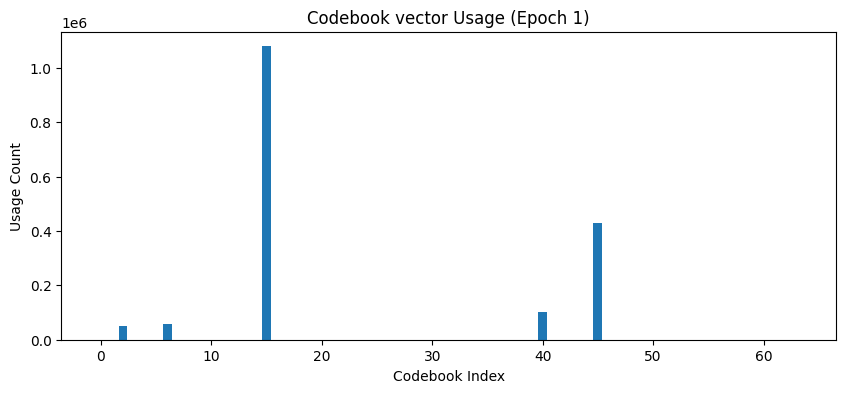

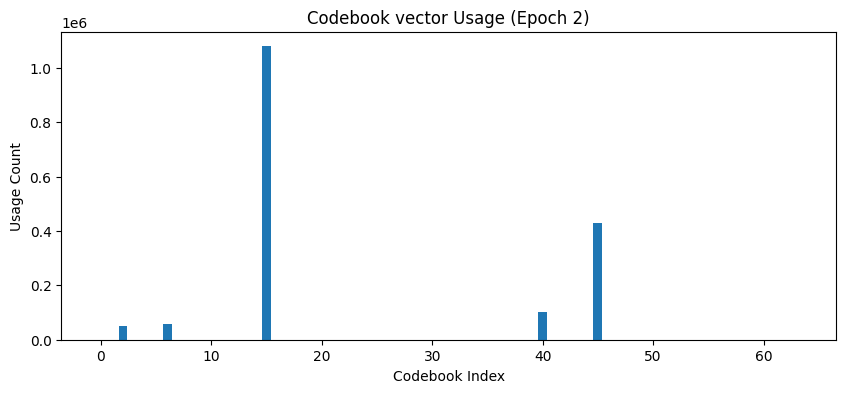

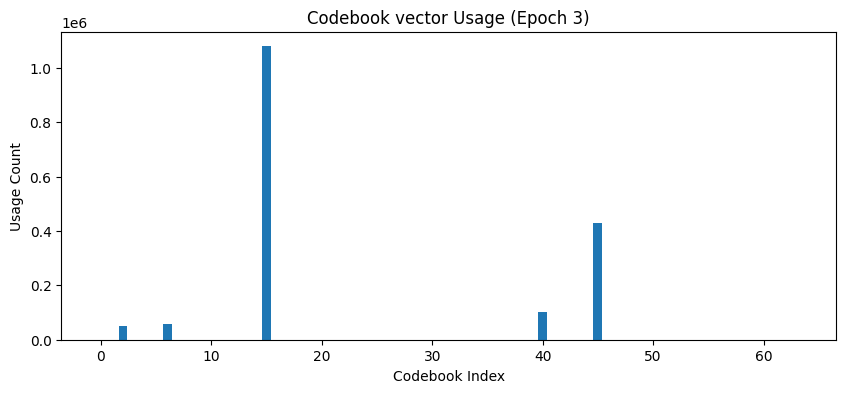

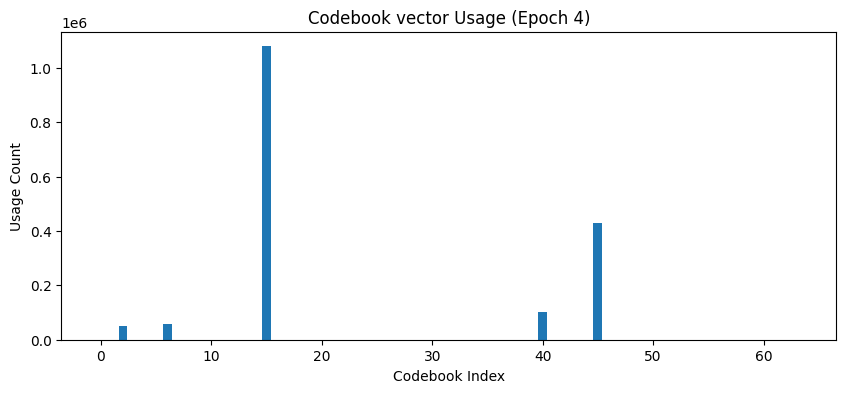

In [25]:
# 코드북 사용량 시각화
for epoch_idx, usage in enumerate(usage_history, 1):
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(NUM_EMBEDDINGS), usage)
    plt.title(f"Codebook vector Usage (Epoch {epoch_idx})")
    plt.xlabel("Codebook Index")
    plt.ylabel("Usage Count")
    plt.show()